<a href="https://colab.research.google.com/github/manishaachary13/Bike-Sharing-Demand/blob/main/Bike_Demand_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Bike Sharing Demand Prediction**


##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary**

This project focuses on predicting **Bike-Sharing Demand** using **Machine Learning** models based on various factors such as weather conditions, time of day, seasonality, and holidays. The dataset includes both **numerical** (e.g., temperature, humidity, visibility) and **categorical features** (e.g., seasons, holidays).

**Key steps involved**:

1. **Data Cleaning**: Handled missing values, outliers, and duplicates.
2. **Feature Engineering**: Encoded categorical variables, removed multicollinearity, and applied scaling.
3. **Exploratory Data Analysis (EDA)**: Analyzed correlations and patterns between features and demand.
4. **Model Development**: Trained machine learning models to predict bike rentals accurately.

**Objectives:**

The goal is to build an accurate machine learning model to forecast the **number of bike rentals** at a given time, enabling better planning for bike availability and improving user experience.

The results provide insights into factors affecting bike-sharing demand, enabling better resource planning and decision-making.

### **GitHub Link -** https://github.com/manishaachary13/Bike-Sharing-Demand/blob/5dbf010fce43f4159594f78082d2d367f3eb2692/bike.ipynb

# **Problem Statement**

As urban populations grow, so does the need for efficient, sustainable transportation solutions. Bike-sharing systems have emerged as an increasingly popular option in many cities, offering a flexible, eco-friendly way to reduce traffic congestion and pollution. However, managing these systems presents unique challenges, particularly when it comes to maintaining an optimal balance between bike availability and user demand.

The central issue is **predicting the number of bikes needed at specific locations at different times of the day**. Demand for bike rentals fluctuates dramatically based on various factors, including the time of day, weather conditions, and whether it is a holiday or a regular working day. Without an accurate forecasting mechanism, bike-sharing providers risk under-serving customers during peak demand periods or wasting resources during off-peak times.

This problem is compounded by the influence of **weather conditions** (temperature, humidity, windspeed, etc.), which can significantly affect bike usage. For instance, a sudden drop in temperature or an unexpected rainstorm can lead to a sharp decline in rentals, while pleasant weather might result in an increase. Furthermore, factors like **holidays** or **city events** introduce irregular patterns in bike demand, making it even harder to predict usage accurately.

Given this complexity, developing a robust machine learning model that can accurately predict bike-sharing demand on an hourly basis is critical. The ability to forecast bike rental needs will not only help optimize bike availability across the city but also enhance customer satisfaction by minimizing wait times. Moreover, it will lead to better resource management, ensuring that bikes are neither over-supplied nor under-utilized, which in turn can reduce operational costs for the service provider.

The goal of this project is to design a **demand prediction model** that accounts for the various factors influencing bike rentals—such as time-based trends (e.g., morning or evening rush hours), weather conditions, and special events—by analyzing historical bike rental data. With this model, we aim to provide bike-sharing companies with a tool to **anticipate demand more effectively**, ensuring that the right number of bikes is available at the right time and place.




# ***Let's Begin !***

## **Know Your Data**

### Import Libraries

In [125]:
#Importing the Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import skew
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [126]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [127]:
#Loading the dataset
bike_sharing_df = pd.read_csv('/content/drive/MyDrive/dataset/SeoulBikeData.csv',encoding='unicode_escape')

### Dataset First View

In [128]:
#First 5 observations
bike_sharing_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [129]:
#Last 5 observations
bike_sharing_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Dataset Rows & Columns count

In [130]:
#Shape of the dataset
bike_sharing_df.shape

(8760, 14)

In [131]:
#List of columns of the dataframe
bike_sharing_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

### Dataset describe

**Variable Description**

1. **Date**: The specific day the bike rental data was recorded.
2. **Rented Bike Count**: The number of bikes rented during the hour.(**Target variable**)
3. **Hour**: The hour of the day when the rental record was taken (0-23).
4. **Temperature(°C)**: The recorded temperature in Celsius at the time of the rental.
5. **Humidity(%)**: The percentage of humidity in the air at the time.
6. **Wind Speed (m/s)**: The wind speed in meters per second at the time.
7. **Visibility (10m)**: The distance of visibility in units of 10 meters.
8. **Dew Point Temperature(°C)**: The temperature at which moisture begins to condense.
9. **Solar Radiation (MJ/m2)**: The amount of solar energy reaching the ground, in megajoules per square meter.
10. **Rainfall(mm)**: The amount of rainfall in millimeters during the hour.
11. **Snowfall (cm)**: The amount of snowfall in centimeters during the hour.
12. **Seasons**: The season during which the data was recorded (Winter, Spring, Summer, Autumn).
13. **Holiday**: Indicates whether the day was a holiday (holiday, No holiday).
14. **Functioning Day**: Indicates whether bike rentals were operational (yes or no).

In [132]:
#Statistical description of the dataframe
bike_sharing_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [133]:
#A concise summary of the dataframe
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

### Unique Values

In [134]:
#Creating function to return all the unique values each categorical column can have
def cat_unique_vals(cat_cols,df):
  for col in cat_cols:
    print("The values that the categorical column",col,"can take are:",df[col].unique())

In [135]:
#Checking the possible values important and meaningful categorical columns can have.
categorical_columns=['Seasons','Holiday']
cat_unique_vals(categorical_columns,bike_sharing_df)

The values that the categorical column Seasons can take are: ['Winter' 'Spring' 'Summer' 'Autumn']
The values that the categorical column Holiday can take are: ['No Holiday' 'Holiday']


In [136]:
#Creating a function that performs a groupby operation and returns a dataframe for analysis
def create_df_analysis(col):
  return bike_sharing_df.groupby(col)['Rented Bike Count'].sum().reset_index()

In [137]:
#Seasons column
seasons_col = create_df_analysis('Seasons')
seasons_col

,Seasons,Rented Bike Count
0,Autumn,1790002
1,Spring,1611909
2,Summer,2283234
3,Winter,487169


Summary of what I have done so far:
1. **Overview**
* **Records**: 8,760 (hourly data).
* **Columns**: 14 (10 numerical, 4 categorical).
* **Target**: Rented Bike Count (0–3,556 bikes/hour).
2. **Key Features**
* **Numerical:**
Temperature: -17.8°C to 39.4°C.
Humidity: 0% to 98%.
Wind Speed: 0–7.4 m/s.
Solar Radiation: Max: 3.52 MJ/m².
Rainfall/Snowfall: Max: 35 mm / 8.8 cm.
* **Categorical:**
Seasons: [Winter, Spring, Summer, Autumn].
Summer: Highest rentals, Winter: Lowest.
Holiday: [Holiday, No Holiday].
Functioning Day: [Yes, No].
3. **Insights:**
Summer & Autumn → Peak rentals.
Winter → Lowest rentals.
Weather: Extreme cold, rain, and snow reduce demand.
Functioning Days: Higher rentals observed.


## **Data Visualization And EDA**

#### Chart - 1

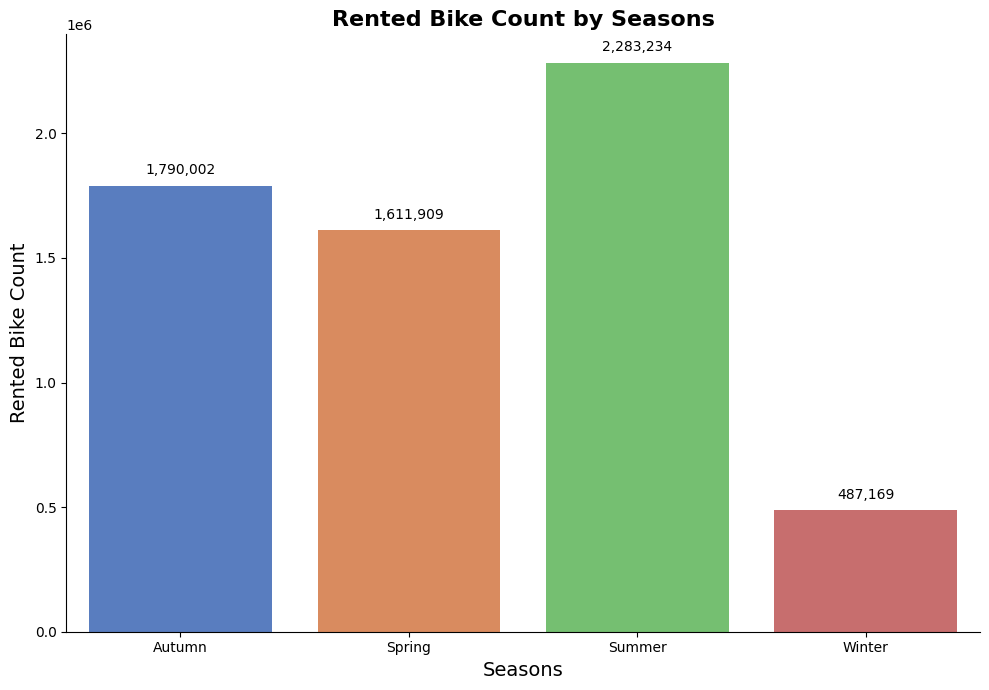

In [220]:
# Creating a visualization for the Seasons column
plt.figure(figsize=(10, 7))

# Creating the barplot
splot = sns.barplot(data=seasons_col, x='Seasons', y='Rented Bike Count', palette='muted')

# Annotating the barplot
for p in splot.patches:
    splot.annotate(f"{p.get_height():,.0f}",  # Formatting numbers with commas
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='bottom',
                   xytext=(0, 6), textcoords='offset points')

# Adding labels and title
plt.title("Rented Bike Count by Seasons", fontsize=16, fontweight='bold')
plt.xlabel("Seasons", fontsize=14)
plt.ylabel("Rented Bike Count", fontsize=14)

# Improving the plot aesthetics
sns.despine()  # Removes unnecessary borders
plt.tight_layout()  # Adjusts layout for better appearance
plt.show()


Insights:
* Summer and Autumn together account for a significant portion of total rentals, indicating strong seasonal dependency.
* Winter sees a sharp decline, suggesting customers avoid biking in extreme cold or snowy conditions.


Business Recommendations:
* Increase bike availability and maintenance during Summer and Autumn to meet peak demand.
* Launch special offers and discounts in Spring to attract customers early and boost rentals.
* Offer free accessories like rain covers or safety gear during seasons with unpredictable weather (Spring/Autumn).


#### Chart - 2

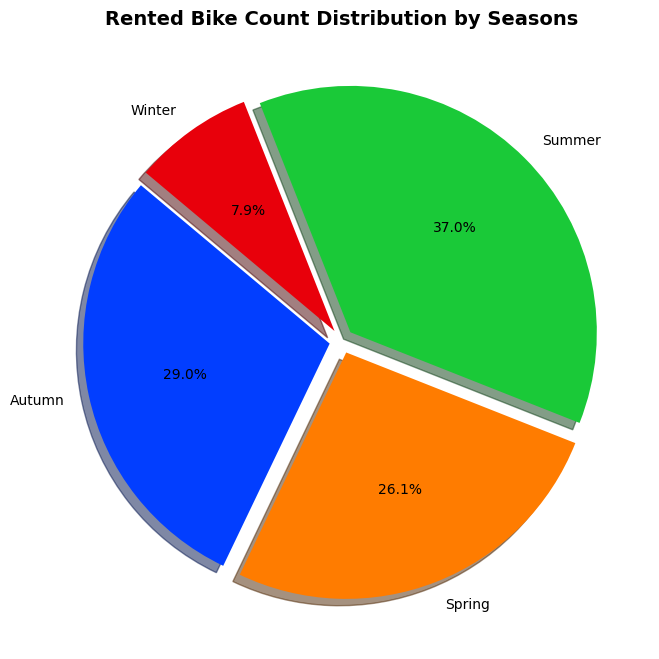

In [224]:
# Preparing data for pie chart
seasons_list = seasons_col['Seasons'].tolist()
rented_count_list = seasons_col['Rented Bike Count'].tolist()

# Defining colors and explode values
palette_color = sns.color_palette('bright')  # Use bright colors
explode = [0.05] * len(seasons_list)  # Apply same explode value for all segments

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(rented_count_list, labels=seasons_list, autopct='%1.1f%%',
        colors=palette_color, explode=explode, startangle=140, shadow=True)

# Adding a title
plt.title("Rented Bike Count Distribution by Seasons", fontsize=14, fontweight='bold')

# Displaying the chart
plt.show()


In [223]:
#Initial preparations for plotting pie chart with percentages
seasons_list = list(seasons_col['Seasons'])
rented_count_list = list(seasons_col['Rented Bike Count'])
palette_color = sns.color_palette('bright')
explode = (0.05,0.05,0.05,0.05)

Insights:
* Summer + Autumn: Together account for 66% of total rentals, highlighting a seasonal bias toward warmer months.
* Winter: Lowest contribution (8%), indicating limited usage due to unfavorable weather conditions.

Business Recommendations:
* Design season-specific passes (e.g., summer unlimited rides, autumn evening rides) to further boost engagement during peak periods.
* Provide discounts or subscription passes in early Spring to increase demand.

#### Chart - 3

In [141]:
#Holidays column
holidays_col = create_df_analysis('Holiday')
holidays_col

,Holiday,Rented Bike Count
0,Holiday,215895
1,No Holiday,5956419


Insights:
* Bike rentals are significantly lower on holidays, suggesting that fewer people commute or engage in biking activities during holidays.
* Rentals on regular (non-holiday) days dominate, indicating higher usage for daily commutes, work, or routine activities.

#### Chart - 4

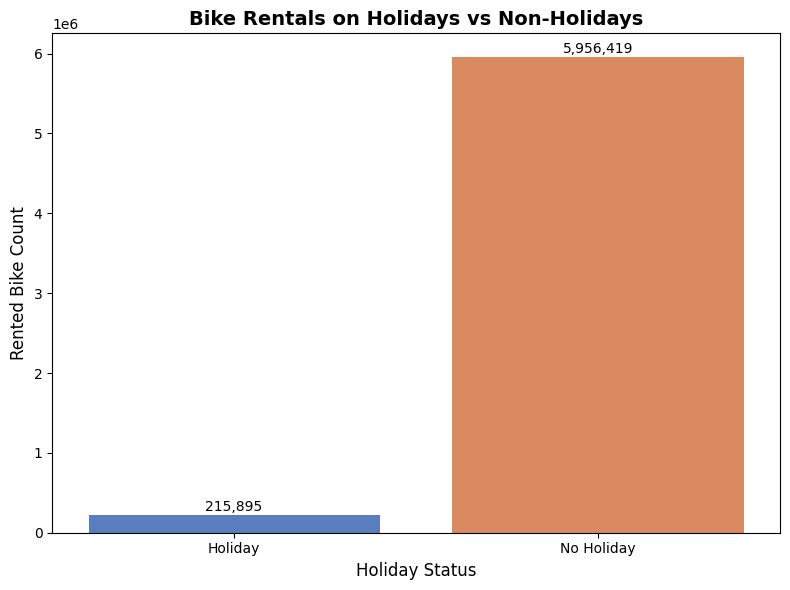

In [226]:
# Creating a visualization for the Holidays dataframe
plt.figure(figsize=(8, 6))  # Slightly more compact for visual appeal
splot = sns.barplot(data=holidays_col, x='Holiday', y='Rented Bike Count', palette='muted')

# Annotating each bar with its respective values
for p in splot.patches:
    splot.annotate(f'{p.get_height():,.0f}',  # Format to add commas for thousands
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 6),  # Small offset for better visibility
                   textcoords='offset points')

# Adding labels and title for clarity
plt.xlabel("Holiday Status", fontsize=12)
plt.ylabel("Rented Bike Count", fontsize=12)
plt.title("Bike Rentals on Holidays vs Non-Holidays", fontsize=14, fontweight='bold')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


Insights:
* Regular Days: High bike demand is driven by daily commutes and routine activities like work or school.
* Holidays: Low rentals indicate reduced commuting and limited adoption of bikes for recreational use.

#### Chart - 5

In [143]:
#Creating a visualisation to analyse the number of bikes rented for different temperatures
temp_bike = create_df_analysis('Temperature(°C)')
temp_bike

,Temperature(°C),Rented Bike Count
0,-17.8,322
1,-17.5,291
2,-17.4,64
3,-16.9,36
4,-16.5,96
...,...,...
541,38.0,1184
542,38.7,475
543,39.0,1033
544,39.3,531


#### Chart - 6

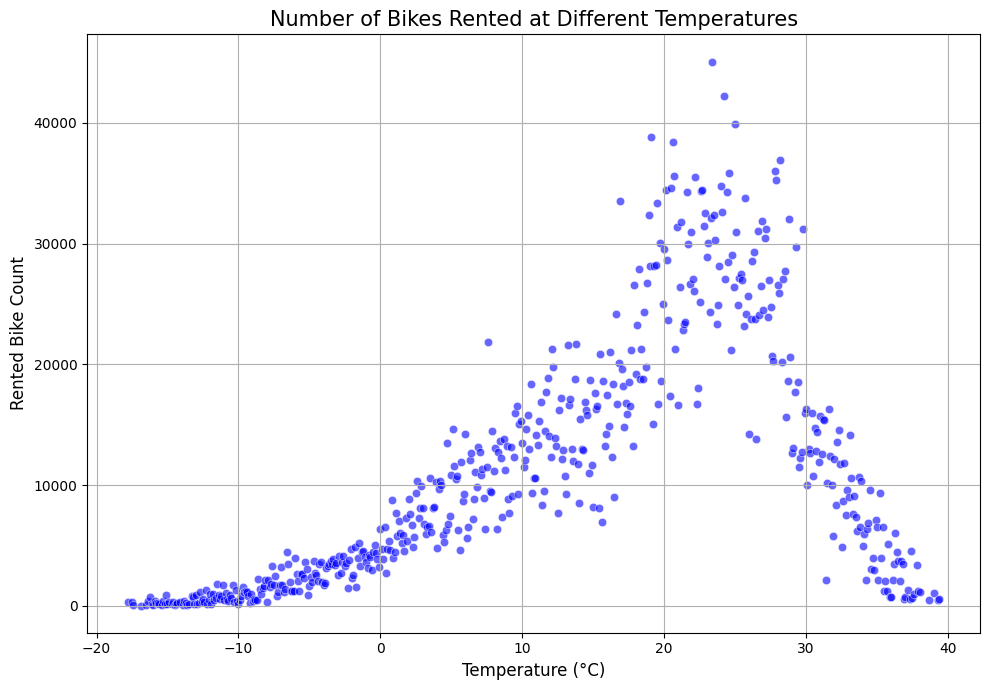

In [227]:
# Creating a visualization for the relationship between temperature and rented bikes
plt.figure(figsize=(10,7))

# Using a scatter plot to better visualize the relationship
sns.scatterplot(data=temp_bike, x='Temperature(°C)', y='Rented Bike Count', color='b', alpha=0.6)

# Adding title and labels
plt.title('Number of Bikes Rented at Different Temperatures', size=15)
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Rented Bike Count', fontsize=12)

# Enhancing plot readability
plt.grid(True)  # Adding gridlines for better readability
plt.tight_layout()  # Adjust layout for better presentation

# Show the plot
plt.show()


Insights:
* **Moderate Temperatures (15°C–25°C):** The highest number of bikes is rented, with peaks reaching above 40,000 rentals. This range represents optimal weather for biking.
* **Extreme Temperatures (Cold <0°C, Hot >30°C):** Rentals are significantly lower, indicating discomfort during harsh weather conditions.
* **The relationship follows a bell-shaped pattern:**
Rentals increase with rising temperatures up to a certain point.
Rentals drop sharply beyond 25°C, likely due to excessive heat.

#### Chart - 7

In [145]:
#Creating a dataframe to analyse the number of bikes rented for different intensities of snowfall
snowfall_bike = create_df_analysis('Snowfall (cm)')
snowfall_bike.head()

,Snowfall (cm),Rented Bike Count
0,0.0,6090314
1,0.1,205
2,0.2,3643
3,0.3,8304
4,0.4,5981


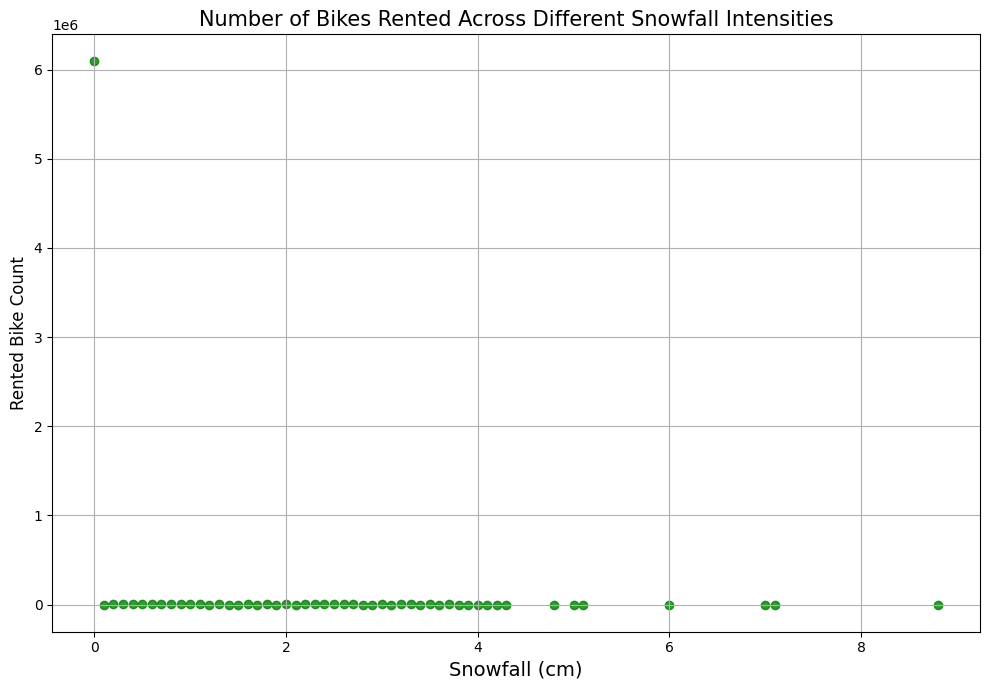

In [233]:
# Creating a visualization for different snowfall intensities
plt.figure(figsize=(10,7))  # Adjusting figure size for better clarity

# Scatter plot with adjusted alpha for transparency and grid
plt.scatter(data=snowfall_bike, x='Snowfall (cm)', y='Rented Bike Count', color='g', alpha=0.8)

# Adding title and labels
plt.title('Number of Bikes Rented Across Different Snowfall Intensities', size=15)
plt.xlabel('Snowfall (cm)', fontsize=14)
plt.ylabel('Rented Bike Count', fontsize=12)

# Adding grid for better readability
plt.grid(True)

# Display the plot
plt.tight_layout()  # Adjust layout for better presentation
plt.show()


Insights:
* No Snowfall (0.0 cm): 6,090,314 rentals → overwhelming majority of bike rentals occur when there is no snowfall.
* Light Snowfall (0.1–0.4 cm): Rentals drop significantly (e.g., 205–8,304 bikes) as snowfall increases, indicating reduced bike usage during snowy conditions.

#### Chart - 8

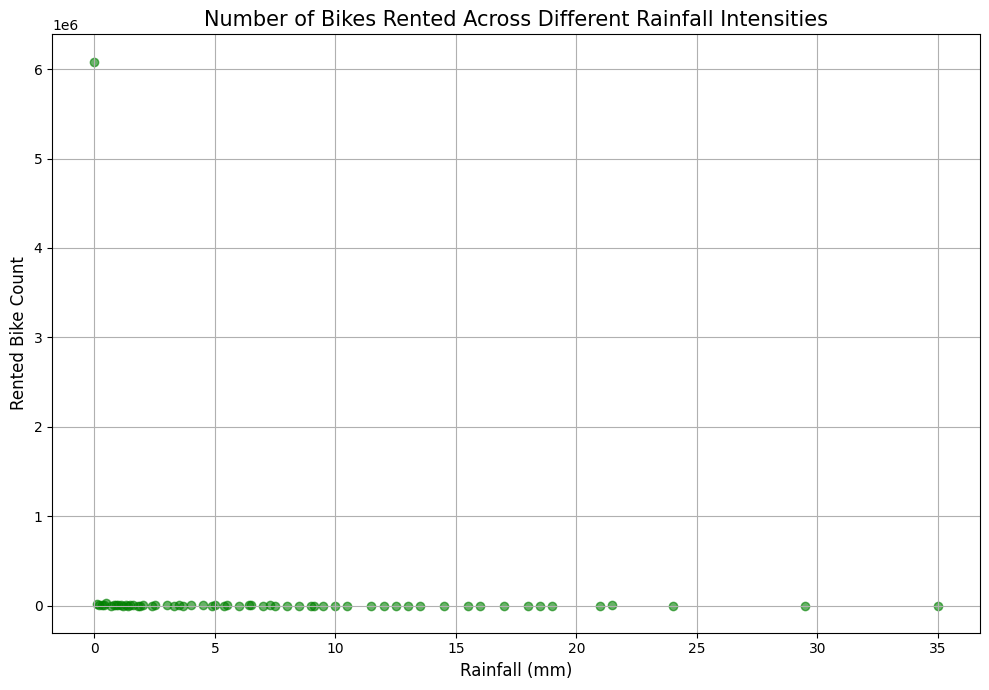

In [234]:
# Creating a visualization for different rainfall intensities
plt.figure(figsize=(10,7))  # Adjusting figure size for better clarity

# Scatter plot with adjusted alpha for transparency and grid
plt.scatter(data=rainfall_bike, x='Rainfall(mm)', y='Rented Bike Count', color='g', alpha=0.6)

# Adding title and labels
plt.title('Number of Bikes Rented Across Different Rainfall Intensities', size=15)
plt.xlabel('Rainfall (mm)', fontsize=12)
plt.ylabel('Rented Bike Count', fontsize=12)

# Adding grid for better readability
plt.grid(True)

# Display the plot
plt.tight_layout()  # Adjust layout for better presentation
plt.show()


Insights:
* No Rainfall (0.0 mm): 6,086,009 rentals → majority of bike rentals occur on days with no rainfall.
* Light Rainfall (0.1–0.4 mm): Rentals significantly decrease (e.g., 15,179 to 2,147 bikes) as rainfall increases, indicating a strong negative effect on bike usage.

#### Chart - 9

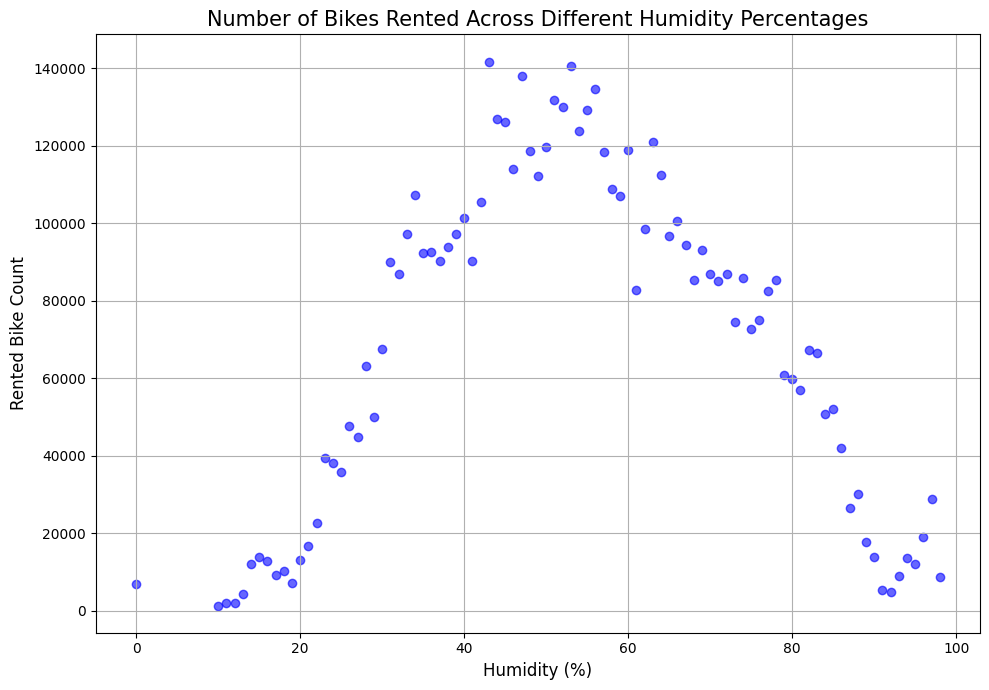

In [235]:
# Plotting a visualization for different humidity percentages
plt.figure(figsize=(10,7))  # Adjusting figure size for clarity

# Scatter plot for better visualization of the relationship
plt.scatter(humidity_bike['Humidity(%)'], humidity_bike['Rented Bike Count'], color='b', alpha=0.6)

# Adding title and labels
plt.xlabel('Humidity (%)', fontsize=12)
plt.ylabel("Rented Bike Count", fontsize=12)
plt.title("Number of Bikes Rented Across Different Humidity Percentages", size=15)

# Adding gridlines for better clarity
plt.grid(True)

# Display the plot
plt.tight_layout()  # Adjust the layout for better presentation
plt.show()


Insights:
* The optimal humidity range for bike rentals is approximately 40%-60%, where the count reaches its highest.
* A steep drop in rentals is observed after 70% humidity. This indicates that high humidity might discourage bike usage due to discomfort.

Business Recommendations:
* Focus marketing and promotional campaigns during periods when humidity falls between 40%-60%, as this is when demand peaks.
* Offer discounted rides during low-humidity mornings or other off-peak times to increase demand.

#### Chart - 10

In [151]:
#Creating a dataframe to analyse the number of bikes rented for different hours of the day
hour_df = create_df_analysis("Hour")
hour_df

,Hour,Rented Bike Count
0,0,197633
1,1,155557
2,2,110095
3,3,74216
4,4,48396
5,5,50765
6,6,104961
7,7,221192
8,8,370731
9,9,235784


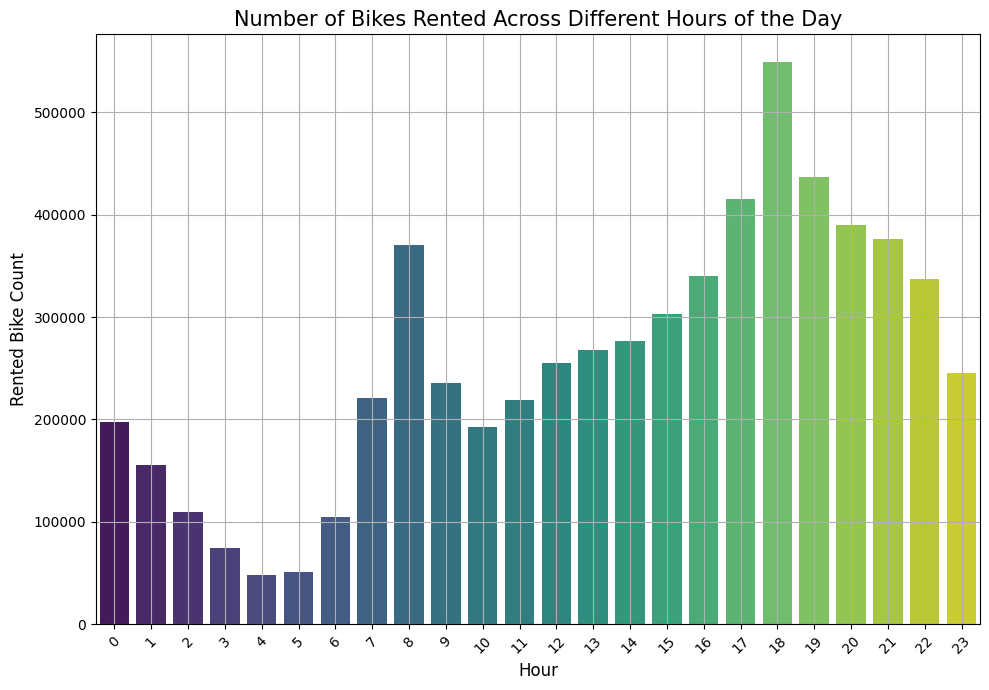

In [236]:
# Creating a visualization for different hours of the day
plt.figure(figsize=(10,7))

# Using seaborn's barplot
sns.barplot(data=hour_df, x='Hour', y='Rented Bike Count', palette='viridis')

# Adding title and labels
plt.title('Number of Bikes Rented Across Different Hours of the Day', size=15)
plt.xlabel('Hour', size=12)
plt.ylabel('Rented Bike Count', size=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adding gridlines for better readability
plt.grid(True)

# Display the plot
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


Insights:
* The highest bike rentals occur during 5 PM to 7 PM (17:00–19:00), peaking at 6 PM (548,568 rentals). This indicates evening commute times have the highest demand for bike rentals.
* Rentals are at their lowest between 12 AM and 5 AM, with the count dropping significantly (minimum at 4 AM: 48,396 rentals). This is likely due to minimal commuting and activity during early morning hours.

Business Recommendations:
* Ensure an adequate supply of bikes at major hubs (near offices, public transport, and residential areas) during the morning (7–9 AM) and evening (5–7 PM) peaks.
* Offer discounted rates or loyalty incentives during off-peak hours (12 AM–6 AM) to encourage ridership during underutilized periods.
* Leverage the evening peak (5–7 PM) for campaigns such as “Post-Work Specials” or partner with fitness programs to encourage rides after work.

#### Chart - 11

In [153]:
#Creating a dataframe to analyse the number of bikes rented for different visibility rates
visibility_bike = create_df_analysis('Visibility (10m)')
visibility_bike

,Visibility (10m),Rented Bike Count
0,27,83
1,33,33
2,34,24
3,38,98
4,53,65
...,...,...
1784,1996,19547
1785,1997,18324
1786,1998,19518
1787,1999,18466


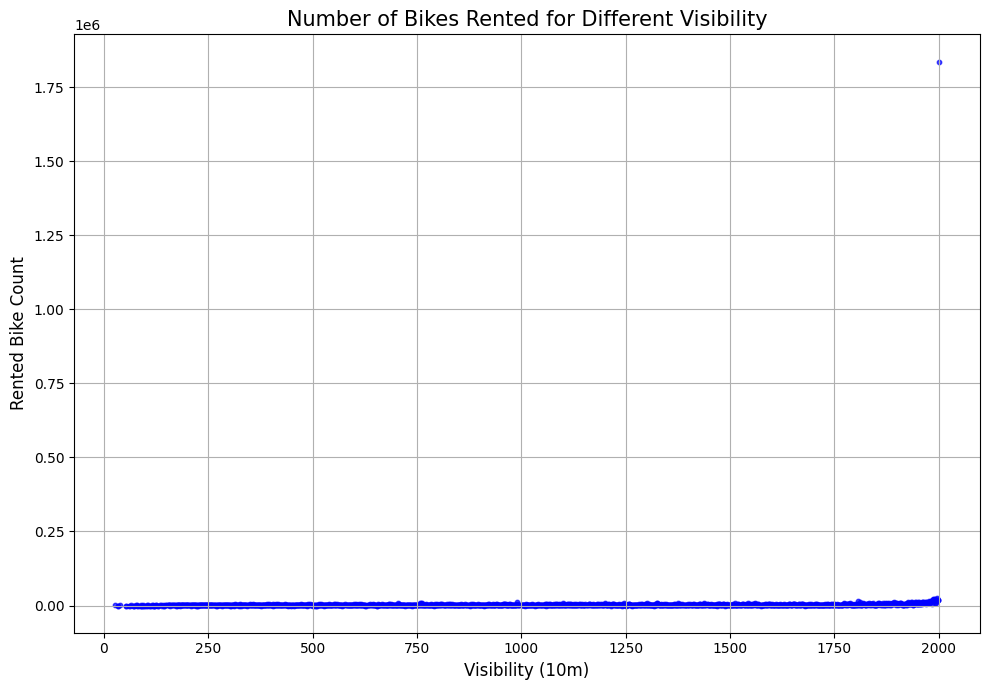

In [238]:
# Creating a visualization for number of bikes rented in different visibility ranges
plt.figure(figsize=(10,7))

# Using a scatter plot instead of line plot
plt.scatter(visibility_bike['Visibility (10m)'], visibility_bike['Rented Bike Count'], c='b', s=10, alpha=0.7)

# Adding labels and title
plt.xlabel('Visibility (10m)', size=12)
plt.ylabel('Rented Bike Count', size=12)
plt.title('Number of Bikes Rented for Different Visibility', size=15)

# Adding gridlines for better readability
plt.grid(True)

# Display the plot
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


Insights:

* Visibility below 100 meters shows minimal bike rentals, which is likely due to safety concerns or poor weather conditions reducing user demand.
*Rentals increase steadily as visibility improves, indicating a linear relationship between good visibility and higher demand for bike rentals.

Business Recommendations:
* Ensure higher bike availability during periods of clear weather (visibility close to 2000 meters) to accommodate increased demand.
* Integrate real-time weather and visibility alerts into your app or system to inform users of current conditions and bike availability.

#### others

##### **Handling Null Value**
* A null value (or missing value) indicates the absence of a value in a dataset.
* Null values can distort analysis and impact model performance, especially in machine learning.

In [155]:
#Checking for null values
bike_sharing_df.isnull().sum()

,0
Date,0
Rented Bike Count,0
Hour,0
Temperature(°C),0
Humidity(%),0
Wind speed (m/s),0
Visibility (10m),0
Dew point temperature(°C),0
Solar Radiation (MJ/m2),0
Rainfall(mm),0


##### **Handling Duplicate Values**
* A duplicate value refers to a data entry that appears more than once in a dataset, usually with identical or nearly identical information across one or more columns.
* In machine learning models, duplicates can lead to overfitting or incorrect predictions, as the model sees repeated patterns.

In [156]:
#Checking for duplicate values
bike_sharing_df.duplicated().sum()

0

##### **Removing Outliers**
* An outlier is a data point that differs significantly from the other observations in a dataset. It is much larger or smaller than most other values and may indicate variability, errors, or novel insights.



In [157]:
#Creating a list of columns that can possibly contain outliers
possible_outlier_cols = list(set(bike_sharing_df.describe().columns)-{'Rented Bike Count','Hour'})
possible_outlier_cols

['Wind speed (m/s)',
 'Dew point temperature(°C)',
 'Snowfall (cm)',
 'Rainfall(mm)',
 'Temperature(°C)',
 'Visibility (10m)',
 'Humidity(%)',
 'Solar Radiation (MJ/m2)']

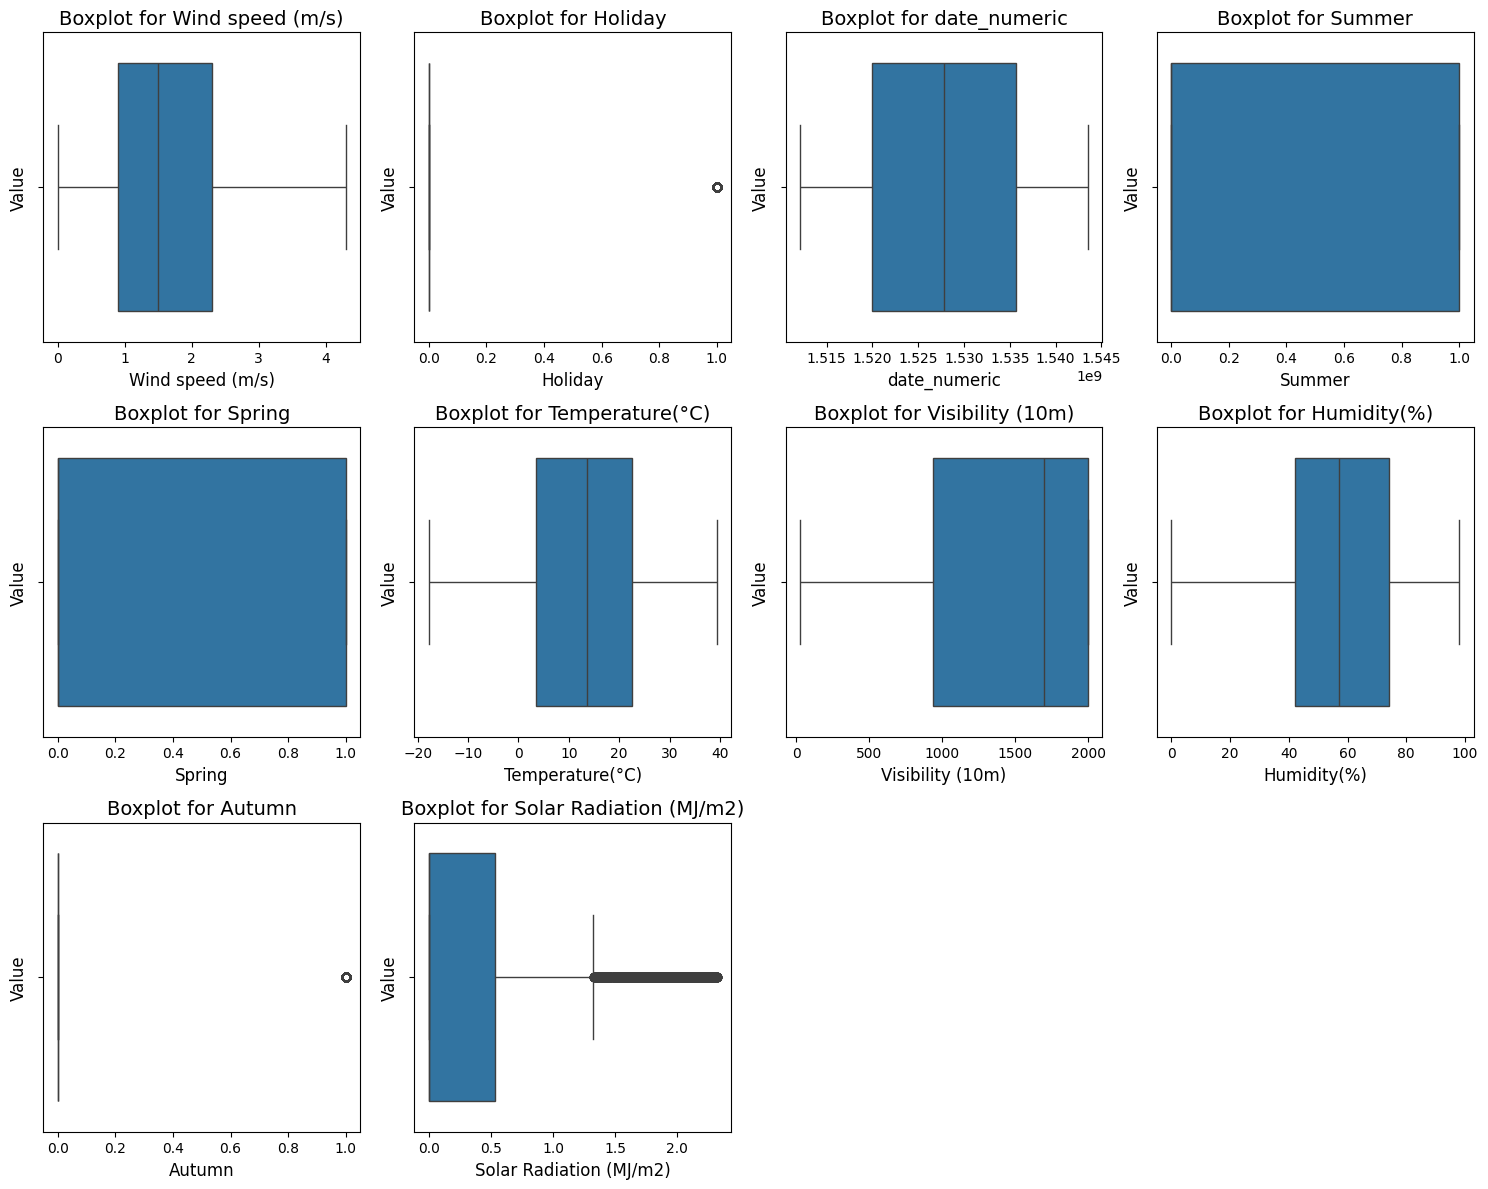

In [241]:
# Creating a list of columns that may contain outliers
possible_outlier_cols = list(set(bike_sharing_df.describe().columns) - {'Rented Bike Count', 'Hour'})

# Creating boxplots to detect outliers in the selected columns
plt.figure(figsize=(15, 12))  # Adjusted figure size for more subplots
for index, item in enumerate(possible_outlier_cols):
    plt.subplot(3, 4, index + 1)  # Adjusted to 3 rows and 4 columns grid
    sns.boxplot(data=bike_sharing_df, x=item)
    plt.xlabel(item, size=12)
    plt.ylabel('Value', size=12)
    plt.title(f'Boxplot for {item}', size=14)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


Insihgts:
* Rainfall: Mostly low; heavy rain outliers may disrupt bike rentals.
* Dew Point Temp: Moderate range, indicating comfortable conditions for biking.
* Visibility: Generally high; low visibility may impact safety and usage.
* Solar Radiation: Mostly low; cloud cover can affect rentals.
* Temperature: Ideal range is 10°C–25°C; extreme cold/heat reduces demand.
* Snowfall: Minimal; occasional heavy snow can disrupt biking.
* Wind Speed: Generally low; strong winds might discourage riders.
* Humidity: Moderate (60–70%) is ideal; high humidity may deter biking.


Business Recommendations:
* Promote Rentals during clear, moderate weather (10–25°C, high visibility).
* Prepare for Extremes: Offer shelters, safety gear, and discounts during heavy rain, low visibility, or snowfall.
* Target Favorable Seasons: Incentivize biking during moderate temperatures.
* Weather Alerts: Use forecasts to optimize operations and promotions.

In [159]:
#Creating a list of columns that contains outliers
outlier_cols = ['Rainfall(mm)','Wind speed (m/s)','Snowfall (cm)','Solar Radiation (MJ/m2)']
outlier_cols

['Rainfall(mm)',
 'Wind speed (m/s)',
 'Snowfall (cm)',
 'Solar Radiation (MJ/m2)']

#### **Handling Outliers using IQR**
Outliers are data points that differ significantly from the rest of the data and can skew the results of our analysis. One common method for detecting outliers is by using the Interquartile Range (IQR), which is the range between the first quartile (Q1) and third quartile (Q3) of the dataset.

In [160]:
#Finding the inter-quartile range for the columns with outliers
Q1 = bike_sharing_df[outlier_cols].quantile(0.25)
Q3 = bike_sharing_df[outlier_cols].quantile(0.75)
IQR = Q3-Q1
IQR

,0
Rainfall(mm),0.00
Wind speed (m/s),1.40
Snowfall (cm),0.00
Solar Radiation (MJ/m2),0.93


In [161]:
#Calculating the upper and lower fence for outlier removal
u_fence = Q3 + (1.5*IQR)
l_fence = Q1 - (1.5*IQR)

In [162]:
#Detecting and removing the outliers
bike_sharing_df[outlier_cols] = bike_sharing_df[outlier_cols][~((bike_sharing_df[outlier_cols] < l_fence) | (bike_sharing_df[outlier_cols] > u_fence))]

We apply this calculation to each column containing numerical data that may have outliers. Any values falling outside the range defined by the upper and lower fences are removed.

In [163]:
#Checking the number of outliers deleted
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8599 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8119 non-null   float64
 9   Rainfall(mm)               8232 non-null   float64
 10  Snowfall (cm)              8317 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

**Note:** Usually mean is chosen to impute null values, but i'll be choosing the median because mean is affected very much by outliers whereas the median is not.

#### **Imputing null values**

In [164]:
#Creating a function to impute the null values created by outlier handling.
def impute_null(outlier_cols):
  for col in outlier_cols:
    bike_sharing_df[col].fillna(bike_sharing_df[col].median(),inplace=True)

In [165]:
#Calling the imputing function
impute_null(outlier_cols)

In [166]:
#Checking if the imputation is successful
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

After removing outliers from the dataset, it's common to end up with null values (NaNs) in some columns. This happens because the removal of extreme values might lead to gaps in the data. To ensure that the model can process the data without errors, we handle these missing values through imputation.

In this project, we use the median of each column to impute missing values. The median is chosen because it is less sensitive to outliers compared to the mean, which ensures that the imputation doesn’t introduce bias from extreme values.


**Note:** The imputation is successful and therefore we have handled the outliers sucessfully.

#### **Feature Encoding:**
* Machine Learning models can only work with numerical values and therefore important categorical columns have to encoded into numerical variables. This Process is known as Feature Encoding.

In [167]:
#Encoding for Seasons column
bike_sharing_df['Winter'] = np.where(bike_sharing_df['Seasons']=='Winter', 1, 0)
bike_sharing_df['Spring'] = np.where(bike_sharing_df['Seasons']=='Spring', 1, 0)
bike_sharing_df['Summer'] = np.where(bike_sharing_df['Seasons']=='Summer', 1, 0)
bike_sharing_df['Autumn'] = np.where(bike_sharing_df['Seasons']=='Autumn', 1, 0)

#Removing seasons column since we dont require it now.
bike_sharing_df.drop(columns=['Seasons'],axis=1,inplace=True)

In [168]:
#Encoding for Holiday column
bike_sharing_df['Holiday'] = np.where(bike_sharing_df['Holiday']=='Holiday',1,0)

In [169]:
#Encoding for Functioning day
bike_sharing_df['Functioning Day'] = np.where(bike_sharing_df['Functioning Day']=='Yes',1,0)

In [170]:
#Look of the dataframe after encoding all three columns
bike_sharing_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Winter,Spring,Summer,Autumn
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,1,0,0,0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,1,0,0,0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,1,0,0,0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,1,0,0,0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,1,0,0,0


Key Points:
* The Seasons column was encoded into four binary columns: Winter, Spring, Summer, and Autumn.
* After encoding, the original Seasons column was removed as it was no longer needed.
* These transformations ensure the data is suitable for machine learning models by converting categorical variables into numerical formats.

In [171]:
numeric_df = bike_sharing_df.select_dtypes(include=[float, int])
corr_matrix = numeric_df.corr()


In [172]:
bike_sharing_df['Date'] = pd.to_datetime(bike_sharing_df['Date'], dayfirst=True)
bike_sharing_df['Date'].head()


,Date
0,2017-12-01
1,2017-12-01
2,2017-12-01
3,2017-12-01
4,2017-12-01


In [173]:
bike_sharing_df['date_numeric'] = bike_sharing_df['Date'].apply(lambda x: x.timestamp())


##### Checking Correlation for Feature Removal

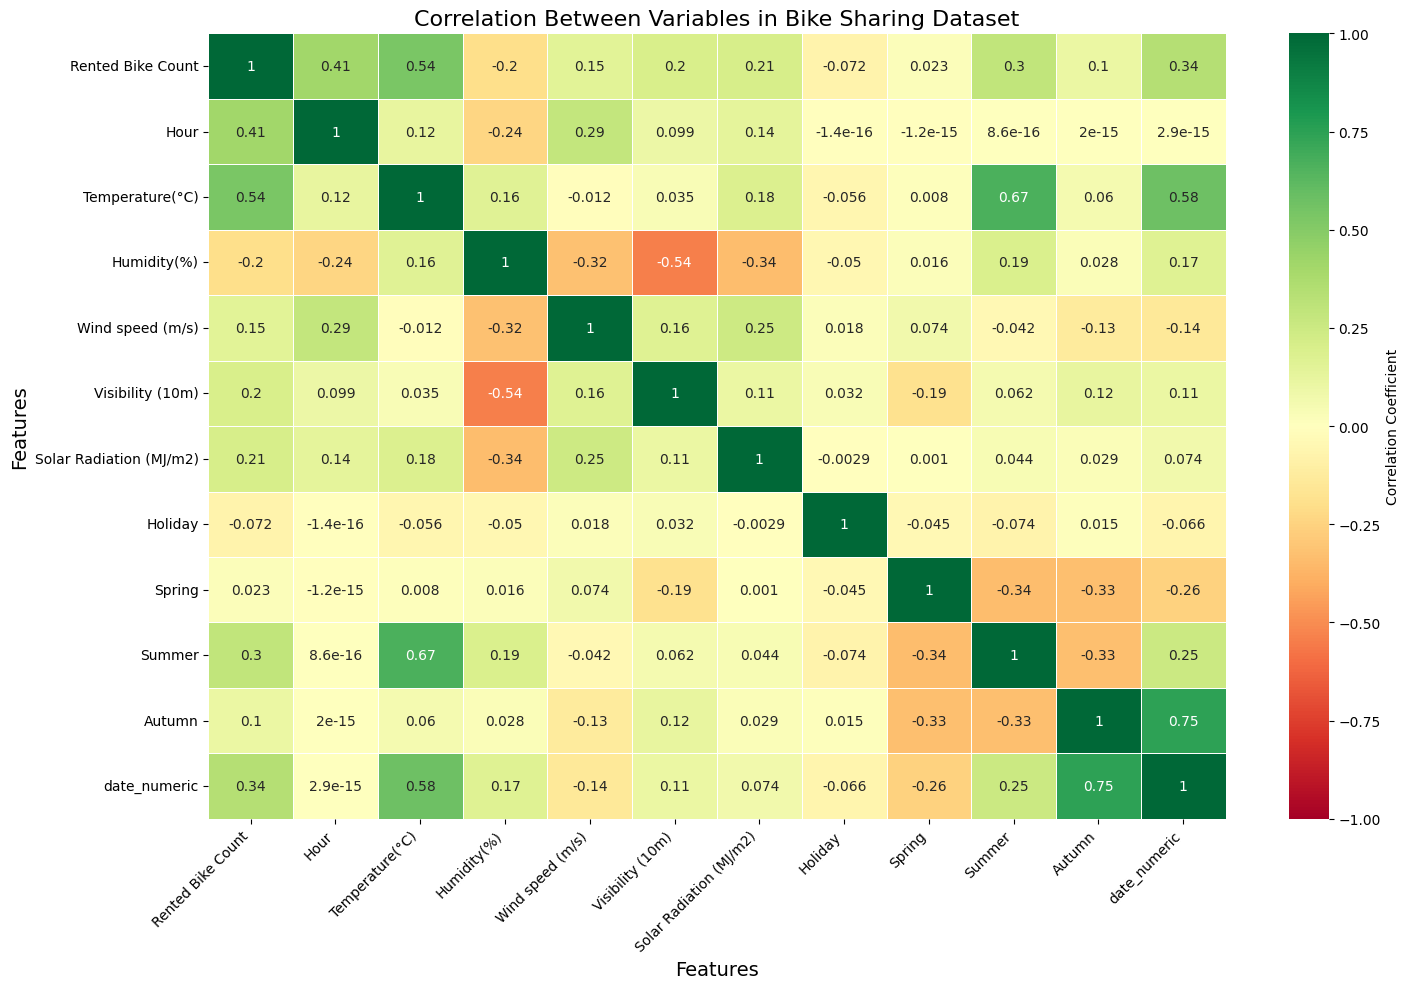

In [242]:
# Plotting the correlation matrix with improved aesthetics
corr_matrix = bike_sharing_df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='RdYlGn',       # A color palette that is intuitive (Red for negative, Green for positive)
    linewidths=0.5,      # Lines between cells for better readability
    vmin=-1, vmax=1,     # Set consistent color scale
    annot_kws={"size": 10},  # Smaller annotation size for better fit
    cbar_kws={'label': 'Correlation Coefficient'}  # Color bar label
)

plt.title('Correlation Between Variables in Bike Sharing Dataset', size=16)
plt.xlabel('Features', size=14)
plt.ylabel('Features', size=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)               # Keep y-axis labels horizontal
plt.tight_layout()  # Adjust layout to ensure everything fits

plt.show()


Insights:
1. Rented Bike Count:
* Positively correlated with:
Temperature (0.54): Warmer weather increases bike rentals.
Solar Radiation (0.21): More sunlight boosts bike usage.
* Negatively correlated with:
Humidity (-0.20): High humidity decreases bike rentals.
Wind Speed (-0.15): Strong winds reduce biking activity.
2. Seasons:
* Winter has a strong negative correlation with Temperature (-0.74) and Rented Bike Count (-0.42), indicating fewer bike rentals in cold weather.
* Summer and Autumn show a moderate positive correlation with bike rentals.
3. Date and Hour:
* Hour has a moderate correlation (0.41) with Rented Bike Count, suggesting higher rentals at specific hours.
4. Weather Conditions:
* Snowfall and Rainfall have negligible correlations with bike rentals but may impact usage indirectly.
5. Functioning Day:
* Slight positive correlation (0.20) with Rented Bike Count, indicating higher rentals on operational days.


##### Removing MultiCollinearity
* Multicollinearity occurs when two or more independent variables (predictors) in a regression model are highly correlated with each other. This makes it difficult to determine the individual effect of each variable on the dependent variable.
* Multicollinearity affects the accuracy of the regression models, and therefore we will check if we have multicollinearity in our dataset and solve it by removing columns which cause multicollinearity.

**Note:** I will check the multicollinearity of our dataset by using the variance inflation factor. Accepted VIF is less than 10.

In [175]:
#Dropping unnecessary columns
bike_sharing_df.drop(columns={'Dew point temperature(°C)','Date'},axis=1,inplace=True)

In [176]:
bike_sharing_df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Functioning Day', 'Winter',
       'Spring', 'Summer', 'Autumn', 'date_numeric'],
      dtype='object')

In [177]:
#Creating a list of independent columns
idv_cols = list(set(bike_sharing_df.columns)-{'Rented Bike Count'})
idv_cols

['Wind speed (m/s)',
 'date_numeric',
 'Spring',
 'Hour',
 'Snowfall (cm)',
 'Holiday',
 'Functioning Day',
 'Winter',
 'Summer',
 'Rainfall(mm)',
 'Temperature(°C)',
 'Visibility (10m)',
 'Humidity(%)',
 'Autumn',
 'Solar Radiation (MJ/m2)']

In [178]:
#Creating a function to calculate the variance inflation factor(VIF)
def calc_vif(X):
    vif = pd.DataFrame()
    vif["Columns"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [179]:
#Calculating the VIF for independent columns
calc_vif(bike_sharing_df[idv_cols])

,Columns,VIF
0,Wind speed (m/s),1.234419
1,date_numeric,16.149331
2,Spring,85361.289452
3,Hour,1.181490
4,Snowfall (cm),NaN
5,Holiday,1.024324
6,Functioning Day,1.080061
7,Winter,83275.924659
8,Summer,86244.870691
9,Rainfall(mm),NaN


**Note:** We can see that the seasons encoding have very high VIF therefore we will eliminate one of thr columnsd. We will drop Winter because it has the lowest bikes rented. The columns Railfall and Snowfall have no VIF at all, so we will drop them too.

In [180]:
#Dropping the Unnecessary columns
bike_sharing_df.drop(columns={'Winter','Rainfall(mm)','Snowfall (cm)'},axis=1,inplace=True)

In [181]:
#Creating a list of remaining independent columns
idv_cols = list(set(bike_sharing_df.columns)-{'Rented Bike Count'})
idv_cols

['Hour',
 'Wind speed (m/s)',
 'Holiday',
 'Functioning Day',
 'date_numeric',
 'Summer',
 'Spring',
 'Temperature(°C)',
 'Visibility (10m)',
 'Humidity(%)',
 'Autumn',
 'Solar Radiation (MJ/m2)']

In [182]:

#Calculating VIF for remaining independent columns
calc_vif(bike_sharing_df[idv_cols])

,Columns,VIF
0,Hour,1.180627
1,Wind speed (m/s),1.234333
2,Holiday,1.022179
3,Functioning Day,1.079757
4,date_numeric,85.820250
5,Summer,6.882213
6,Spring,3.012347
7,Temperature(°C),4.443660
8,Visibility (10m),1.628107
9,Humidity(%),2.040289


In [183]:
#Dropping the Functioning Day column
bike_sharing_df.drop(columns={'Functioning Day'},axis=1,inplace=True)

In [184]:
#Creating a list with remaining independent columns
idv_cols = list(set(bike_sharing_df.columns)-{'Rented Bike Count'})

In [185]:
#Calculating the VIF for remaining independent columns
calc_vif(bike_sharing_df[idv_cols])

,Columns,VIF
0,Hour,1.180012
1,Wind speed (m/s),1.233474
2,Holiday,1.021744
3,date_numeric,50.409010
4,Summer,6.862098
5,Spring,3.011964
6,Temperature(°C),4.420587
7,Visibility (10m),1.627556
8,Humidity(%),2.038660
9,Autumn,4.459494


#### Chart - 13

This correlation finds if the independent variable has a linear relationship with the dependent variable, which is an assumption that has to be satisfied for models like linear regression.

In [249]:
idv_cols = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
            'Solar Radiation (MJ/m2)', 'Holiday', 'Spring', 'Summer', 'Autumn', 'date_numeric']


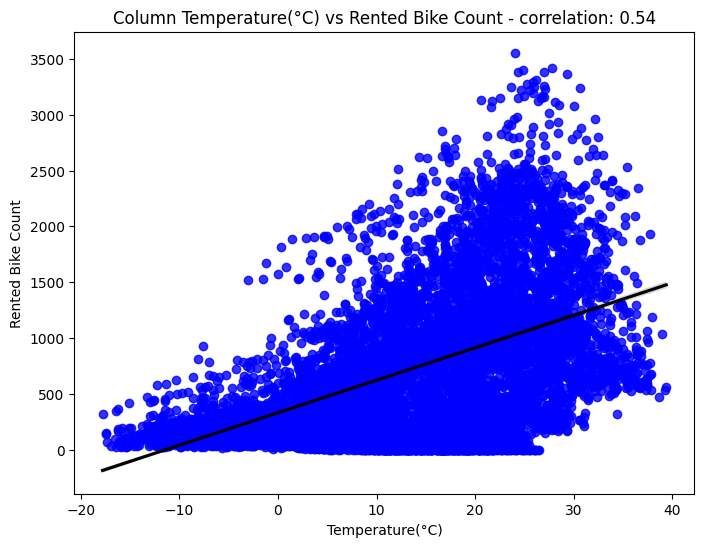

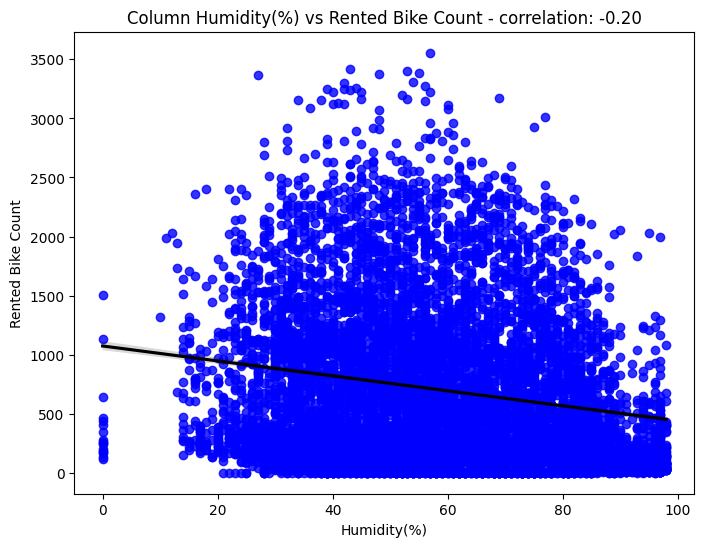

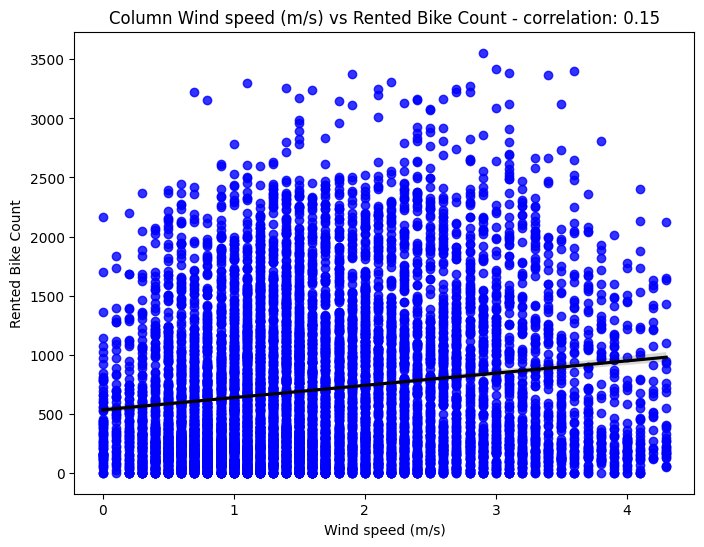

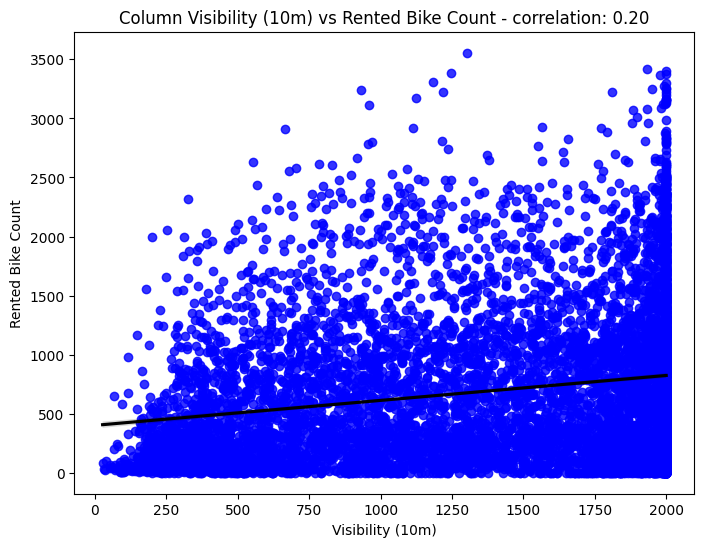

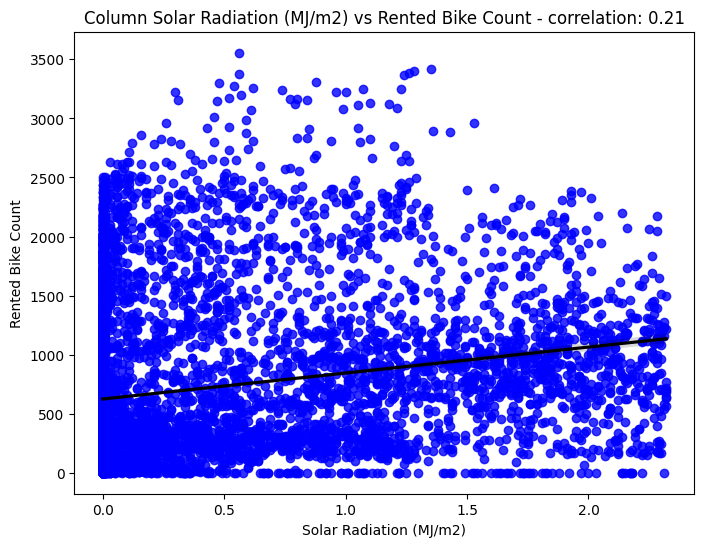

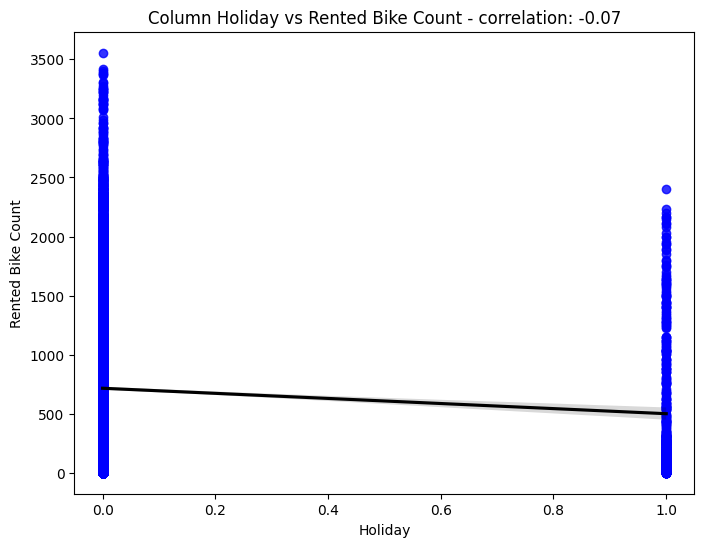

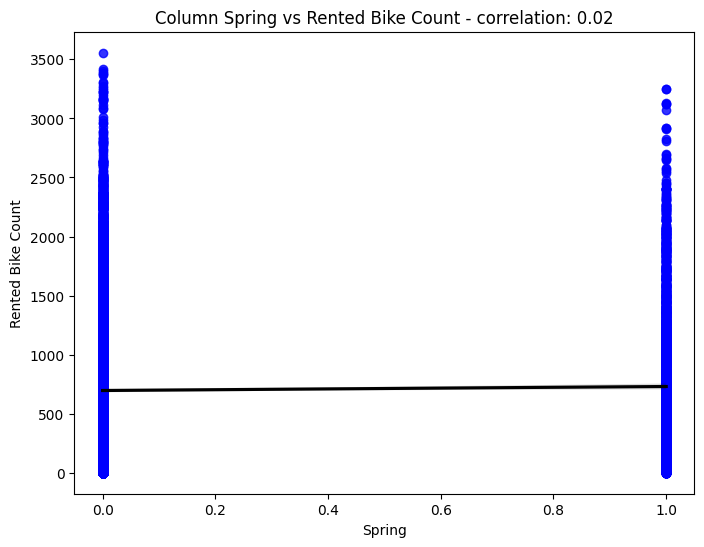

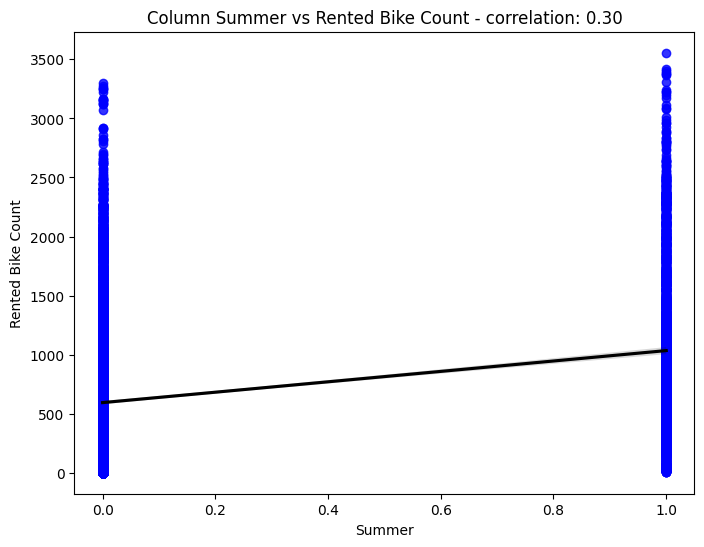

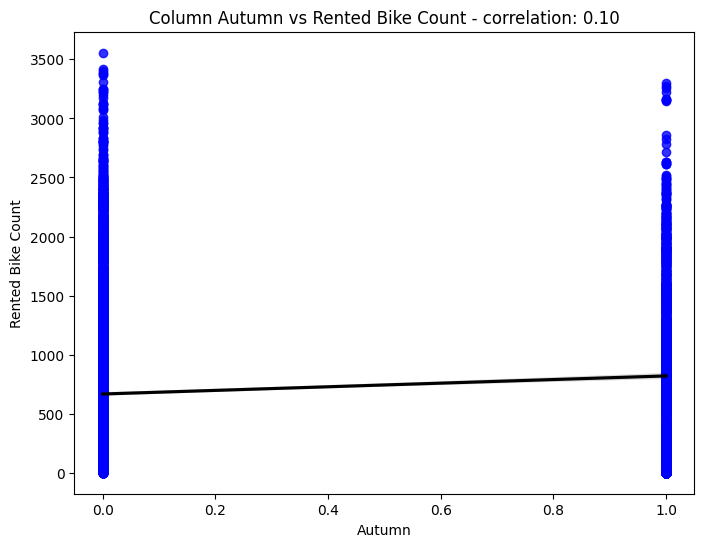

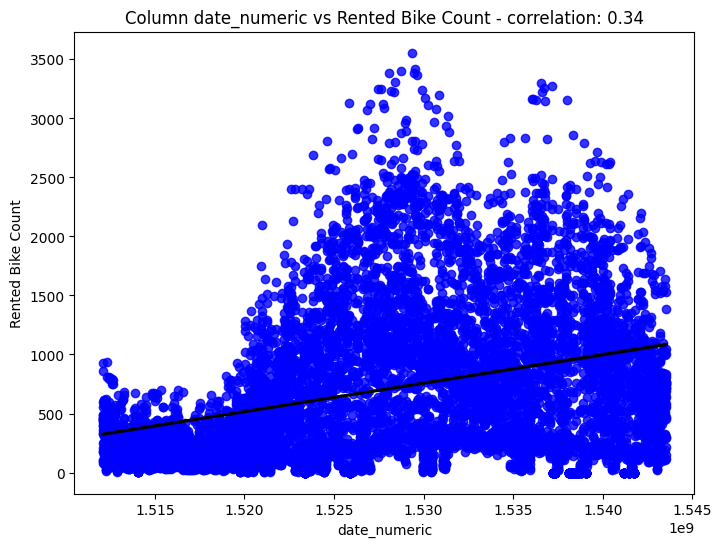

In [250]:
for col in idv_cols:
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.regplot(x=bike_sharing_df[col], y=bike_sharing_df['Rented Bike Count'], scatter_kws={"color": 'blue'}, line_kws={"color": "black"})
    corr = bike_sharing_df[col].corr(bike_sharing_df['Rented Bike Count'])
    ax.set_title(f'Column {col} vs Rented Bike Count - correlation: {corr:.2f}')
    plt.show()

We can see that all the remaining columns that we have, have a linear relationship with the dependent variable. So we have satisfied the assumption and therefore we are good to go...

## **Pre-processing of the Data**

In [187]:
#Creating the dataset for independent and dependent variables
X = bike_sharing_df.drop(columns={'Rented Bike Count'},axis=1)
Y = bike_sharing_df['Rented Bike Count']

In [188]:
#First look of the independent variable dataset
X.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Holiday,Spring,Summer,Autumn,date_numeric
0,0,-5.2,37,2.2,2000,0.0,0,0,0,0,1.512086e+09
1,1,-5.5,38,0.8,2000,0.0,0,0,0,0,1.512086e+09
2,2,-6.0,39,1.0,2000,0.0,0,0,0,0,1.512086e+09
3,3,-6.2,40,0.9,2000,0.0,0,0,0,0,1.512086e+09
4,4,-6.0,36,2.3,2000,0.0,0,0,0,0,1.512086e+09


In [189]:
#First look of the dependent variable dataset
Y.head()

,Rented Bike Count
0,254
1,204
2,173
3,107
4,78


##### Target Feature Conditioning
The distribution of the target feature is observed and in this case because it is a positively skewed distribution. It is normalised using square root transformation.

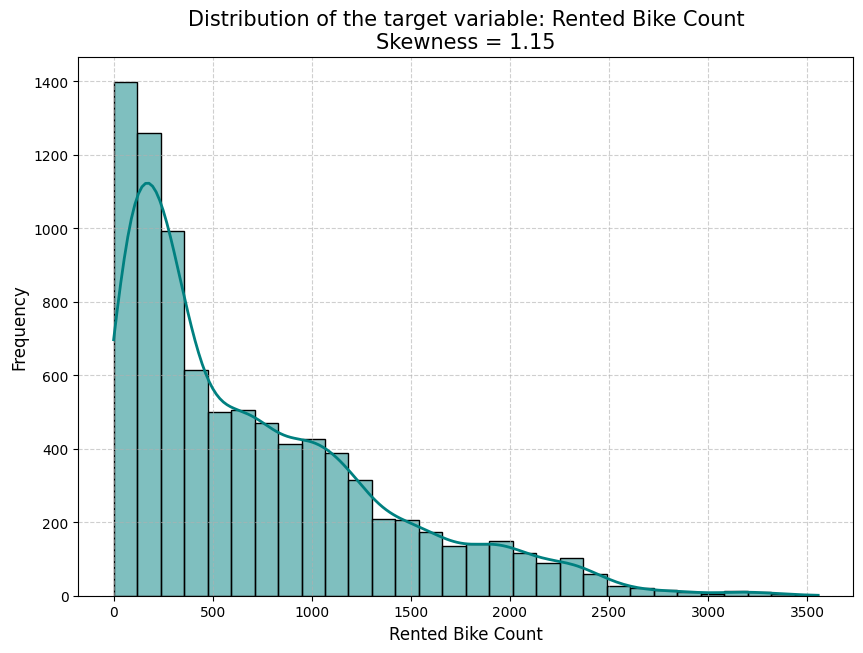

In [251]:
plt.figure(figsize=(10,7))
plt.title(f"Distribution of the target variable: Rented Bike Count\nSkewness = {skew(bike_sharing_df['Rented Bike Count']):.2f}", size=15)
sns.histplot(data=bike_sharing_df, x='Rented Bike Count', kde=True, bins=30, color='teal', line_kws={"color": 'black', "lw": 2})
plt.xlabel("Rented Bike Count", size=12)
plt.ylabel("Frequency", size=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [191]:
#Applying square root transformation on the dependent variable
Y = np.sqrt(Y)

In [192]:
#Creating a dataframe with values of Y for visualisation purposes
vis_Y = Y.reset_index()

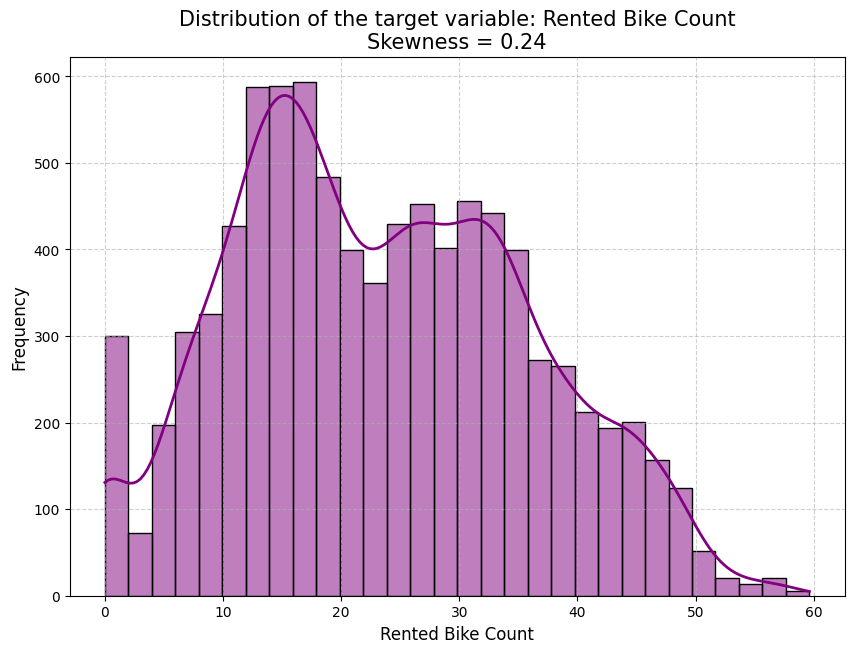

In [252]:
plt.figure(figsize=(10,7))
plt.title(f"Distribution of the target variable: Rented Bike Count\nSkewness = {skew(vis_Y['Rented Bike Count']):.2f}", size=15)
sns.histplot(data=vis_Y, x='Rented Bike Count', kde=True, bins=30, color='purple', line_kws={"color": 'black', "lw": 2})
plt.xlabel("Rented Bike Count", size=12)
plt.ylabel("Frequency", size=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


##### Spliting Dataset into Train and Test Dataset

In [194]:
#Splitting the dataset into test and train datasets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [195]:
#Shape of the train set of the independent values
X_train.shape

(6570, 11)

In [196]:
#Shape of the test set of the independent values
X_test.shape

(2190, 11)

##### Feature Scaling:
* Feature scaling is a data preprocessing technique used to normalize or standardize the range of independent variables (features) in a dataset. This ensures that all features contribute equally to a machine learning model, particularly when the model is sensitive to feature magnitudes.

Two ways of feature scaling:
1. Min max normalization
2. Standardisation

**Note:** In this Project we are going to use the Standardisation method with the help of the StandardScaler() function.

In [197]:
#Creating object for the StandardScaler function
scaler = StandardScaler()

In [198]:
#Standardizing the independent variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [199]:
#Overview of what a dataframe looks like after standardizing
X_train

array([[ 1.66765533, -0.74954694,  1.22697808, ..., -0.57582707,
         1.72819284,  1.67343181],
       [ 0.36544652,  0.93615918, -0.54181953, ..., -0.57582707,
        -0.57863913, -0.30260761],
       [ 1.08889586, -1.65916064, -1.22968527, ..., -0.57582707,
        -0.57863913, -1.18189788],
       ...,
       [-0.06862308,  1.06133538, -0.05048686, ...,  1.73663249,
        -0.57863913,  0.18903856],
       [-1.66021162, -0.37401835,  0.04777967, ..., -0.57582707,
        -0.57863913, -0.43497389],
       [ 1.23358573, -0.47415931,  1.22697808, ..., -0.57582707,
        -0.57863913, -0.65243277]])

## <b> Model Implementation:</b>


Machine learning models can be described as programs that are trained to find patterns or trends within data and predict the result for new data.

In this project we are dealing with a regression problem, therefore we will be using regression models. Some popular examples are Linear Regression and polynomial regression.

In this project we will be include the following models:
1. Linear regression.
2. Ridge regression (Linear regression with L2 regularization).
3. Lasso regression (Linear regression with L1 regularization).
4. Random forest regression.

### <b>Linear regression:</b>
As stated earlier linear regression is a regression technique, and it comes under supervised learning. Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable value (x). So, this regression technique finds out a linear relationship between x (input) and y(output).

Train R²: 0.4838, Test R²: 0.4561
Train MSE: 79.4832, Test MSE: 85.9129
Train MAE: 6.5419, Test MAE: 6.7737


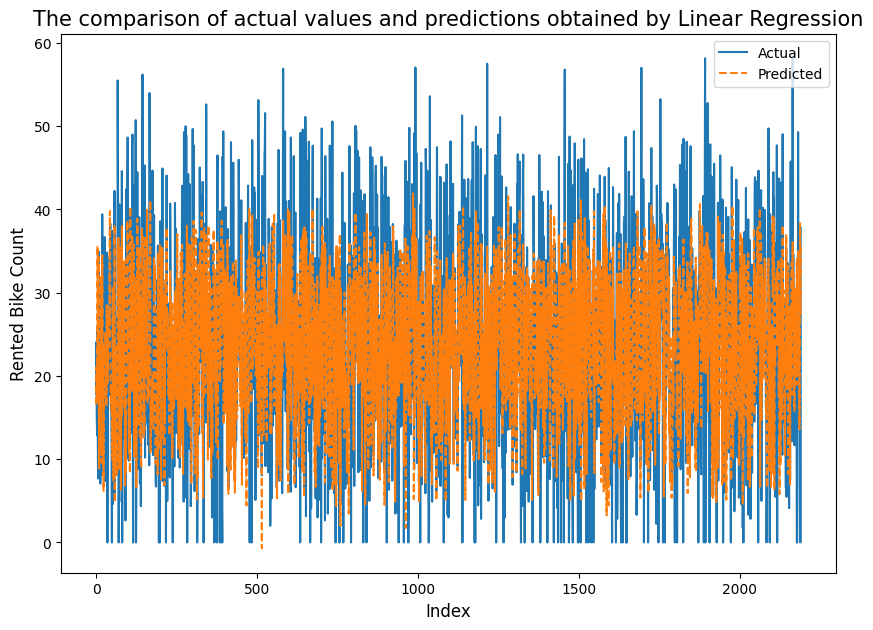

In [254]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Training the linear regression model
lr_model = LinearRegression().fit(X_train, Y_train)

#Checking the score of the linear regression model
train_score = lr_model.score(X_train, Y_train)
test_score = lr_model.score(X_test, Y_test)

#Getting the coefficient values
coefficients = lr_model.coef_

#Predicting the value of the dependent variable for train and test dataset
Y_train_pred_lr = lr_model.predict(X_train)
Y_test_pred_lr = lr_model.predict(X_test)

#Evaluating the model performance
mse_train = mean_squared_error(Y_train, Y_train_pred_lr)
mse_test = mean_squared_error(Y_test, Y_test_pred_lr)
mae_train = mean_absolute_error(Y_train, Y_train_pred_lr)
mae_test = mean_absolute_error(Y_test, Y_test_pred_lr)
r2_train = r2_score(Y_train, Y_train_pred_lr)
r2_test = r2_score(Y_test, Y_test_pred_lr)

#Printing the evaluation metrics
print(f"Train R²: {r2_train:.4f}, Test R²: {r2_test:.4f}")
print(f"Train MSE: {mse_train:.4f}, Test MSE: {mse_test:.4f}")
print(f"Train MAE: {mae_train:.4f}, Test MAE: {mae_test:.4f}")

#Creating a function to plot the comparison between actual values and predictions
def plot_comparison(y_pred, model_name):
    plt.figure(figsize=(10,7))
    plt.title(f"The comparison of actual values and predictions obtained by {model_name}", size=15)
    plt.plot(Y_test.values, label="Actual", color='#1f77b4')
    plt.plot(y_pred, label="Predicted", color='#ff7f0e', linestyle='--')
    plt.xlabel("Index", size=12)
    plt.ylabel("Rented Bike Count", size=12)
    plt.legend()
    plt.show()

#Plotting the comparison between actual and predicted values obtained by Linear Regression
plot_comparison(Y_test_pred_lr, 'Linear Regression')


In [256]:
# Creating a function to calculate and display the evaluation metrics for the model
def eval_metrics(y_pred, model):
    print(f"The evaluation metrics for {model} are given as:\n")

    # Mean squared error for test set
    MSE = mean_squared_error(Y_test, y_pred)
    print(f"MSE : {MSE:.4f}")

    # Root Mean Squared Error (RMSE)
    RMSE = np.sqrt(MSE)
    print(f"RMSE : {RMSE:.4f}")

    # R2 score for prediction on test set
    r2_test = r2_score(Y_test, y_pred)
    print(f"R² : {r2_test:.4f}")

    # Adjusted R2 score for test set
    a_r2_test = 1 - (1 - r2_test) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))
    print(f"Adjusted R² : {a_r2_test:.4f}")

# Calculating and displaying the evaluation metrics for Linear Regression
eval_metrics(Y_test_pred_lr, 'Linear Regression')


The evaluation metrics for Linear Regression are given as:

MSE : 85.9129
RMSE : 9.2689
R² : 0.4561
Adjusted R² : 0.4534


### <b>Ridge Regression:</b>
Ridge regression is a method of estimating the coefficients of regression models in scenarios where the independent variables are highly correlated. It uses the linear regression model with the L2 regularization method.

The best value for alpha in Ridge Regression through GridSearchCV is found to be {'alpha': 1}

Using {'alpha': 1} as the value for alpha gives us a negative mean squared error of: -79.8730557162986


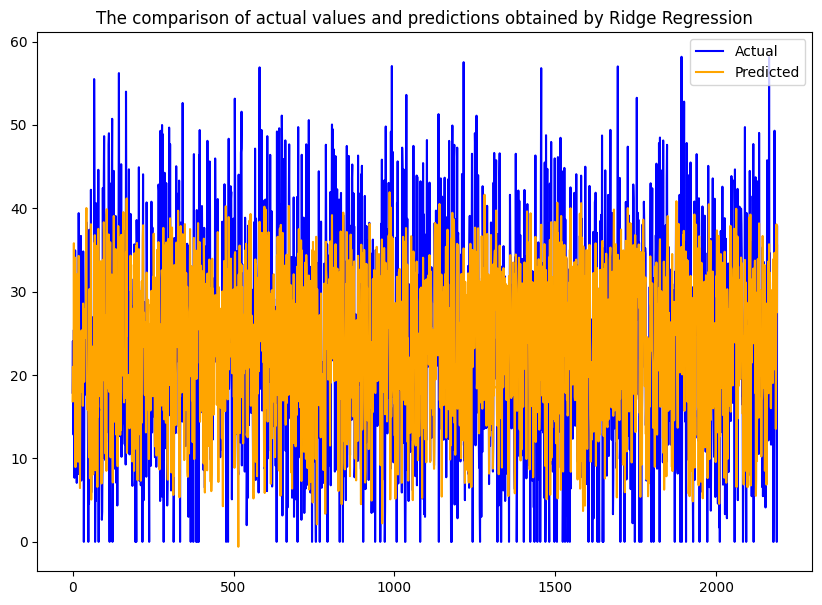

The evaluation metrics for Ridge Regression are given as:
MSE : 86.09099019627128
RMSE : 9.278523061148864
R2 : 0.455004428959334
Adjusted R2 : 0.4522519260752903


In [258]:
# Training the Ridge Regression model using GridSearchCV
ridge = Ridge()
parameters = {'alpha': [1, 0.001, 10, 20, 35, 60, 70, 100, 800, 1200]}
ridge_model_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_model_grid.fit(X_train, Y_train)

# Getting the best parameters for Ridge regression fetched through GridSearchCV
print(f'The best value for alpha in Ridge Regression through GridSearchCV is found to be {ridge_model_grid.best_params_}')
print(f'\nUsing {ridge_model_grid.best_params_} as the value for alpha gives us a negative mean squared error of: {ridge_model_grid.best_score_}')

# Fitting the Ridge regression model on the dataset with appropriate alpha value
ridge_model = Ridge(alpha=35).fit(X_train, Y_train)

# Predicting values of the independent variable on the test set
Y_test_pred_ridge = ridge_model.predict(X_test)

# Plotting the comparison between actual and predicted values obtained by Ridge Regression
def plot_comparison(y_pred, model):
    plt.figure(figsize=(10,7))
    plt.title(f"The comparison of actual values and predictions obtained by {model}")
    plt.plot(np.array(Y_test), label="Actual", color='blue')
    plt.plot(y_pred, label="Predicted", color='orange')
    plt.legend()
    plt.show()

plot_comparison(Y_test_pred_ridge, 'Ridge Regression')

# Calculating the evaluation metrics for Ridge Regression
def eval_metrics(y_pred, model):
    print("The evaluation metrics for " + model + " are given as:")
    MSE = mean_squared_error(Y_test, y_pred)  # Mean squared error for test set
    print("MSE :", MSE)

    RMSE = np.sqrt(MSE)
    print("RMSE :", RMSE)

    r2_test = r2_score(Y_test, y_pred)  # r2 score for prediction on test set
    print("R2 :", r2_test)

    a_r2_test = 1 - (1 - r2_score(Y_test, y_pred)) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))  # adjusted r2 score for test set
    print("Adjusted R2 :", a_r2_test)

eval_metrics(Y_test_pred_ridge, 'Ridge Regression')


**Note:** We can see there is only a very slight difference between the results achieved though Linear Regression and Ridge Regression.

#### Lasso Regression
Lasso regression analysis is a shrinkage and variable selection method for linear regression models. The goal of lasso regression is to obtain the subset of predictors that minimizes prediction error for a quantitative response variable. It uses the Linear regression model with L1 regularization.

In [214]:
#Creating a Lasso regression model using GridSearchCV
lasso = Lasso()
parameters = {'alpha': [0.8,1,10,20,40,80,100,300,700,1000]}
lasso_model_grid = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_model_grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.8, 1, 10, 20, 40, 80, 100, 300, 700,
                                   1000]},
             scoring='neg_mean_squared_error')

In [215]:
#Getting the best parameters for Lasso regression fetched through GridSearchCV
print(f'The best value for alpha in ridge regression through GridSearchCV is found to be {lasso_model_grid.best_params_}')
print(f'\nUsing {lasso_model_grid.best_params_} as the value for aplha gives us a negative mean squared error of: {lasso_model_grid.best_score_}')

The best value for alpha in ridge regression through GridSearchCV is found to be {'alpha': 0.8}

Using {'alpha': 0.8} as the value for aplha gives us a negative mean squared error of: -84.244195589329


In [216]:
#Fitting the Ridge regression model on the dataset with appropriate alpha value
lasso_model=Lasso(alpha=0.8).fit(X_train,Y_train)

In [217]:
#Predicting values of the independent variable on the test set
Y_test_pred_lasso = lasso_model.predict(X_test)

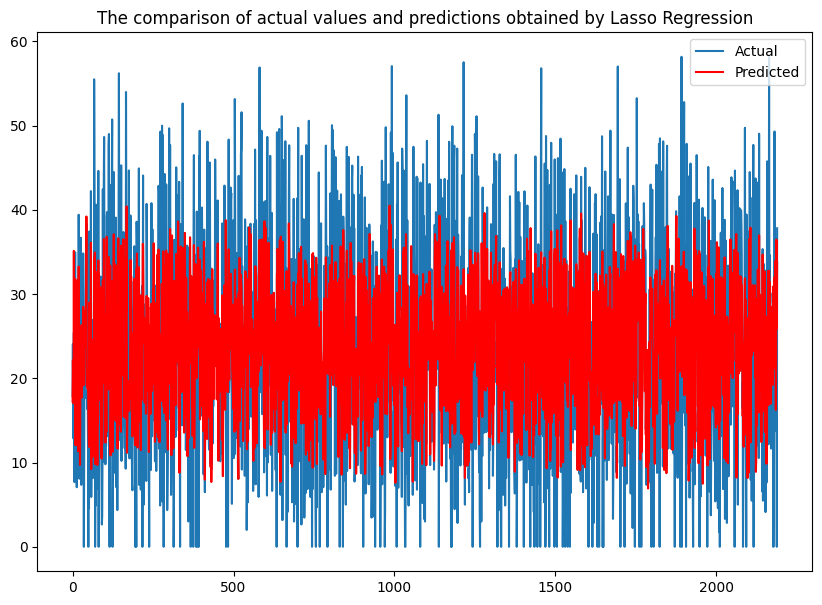

In [218]:
#Plotting the comparison between actual and predicted values obtained by Lasso Regression
plot_comparison(Y_test_pred_lasso,'Lasso Regression')

In [219]:
#Calculating the evaluation metrics for Lasso Regression
eval_metrics(Y_test_pred_lasso,'Lasso Regression')

The evaluation metrics for Lasso Regression are given as:
MSE : 90.1132761795829
RMSE : 9.492801282002215
R2 : 0.4295415083753549
Adjusted R2 : 0.42666040488230117



#### <b>Random Forest Regression:</b>
A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [112]:
#Creating a Random Forest Regression model using GridSearchCV
rand_forest = RandomForestRegressor()


parameters = {'n_estimators' : [int(x) for x in np.linspace(start=10,stop=20, num=5)],
             'max_depth' : [10,15,20],
             'min_samples_split':[2,4],
             'min_samples_leaf':[1,2],
             'bootstrap' : [True,False]
             }

rf_model_grid = GridSearchCV(rand_forest,parameters,scoring='r2',cv=5)
rf_model_grid.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 15, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [10, 12, 15, 17, 20]},
             scoring='r2')

In [113]:
#Getting the best parameters for Random Forest regression fetched through GridSearchCV
print(f'The best value for parameters in random forest regression through GridSearchCV is found to be {rf_model_grid.best_params_}')
print(f'\nUsing {rf_model_grid.best_params_} as the value for the parameters in random forest model, it gives us a negative mean squared error of: {rf_model_grid.best_score_}')

The best value for parameters in random forest regression through GridSearchCV is found to be {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 20}

Using {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 20} as the value for the parameters in random forest model, it gives us a negative mean squared error of: 0.7970193394058699


In [114]:
#Fitting Random Forest model on the dataset with appropriate paramter values
rf_model = RandomForestRegressor(bootstrap=True,max_depth=20,min_samples_leaf=2,min_samples_split=4,n_estimators=15).fit(X_train,Y_train)

In [115]:
#Predicting values of the independent variable on the test set
Y_test_pred_rf = rf_model.predict(X_test)

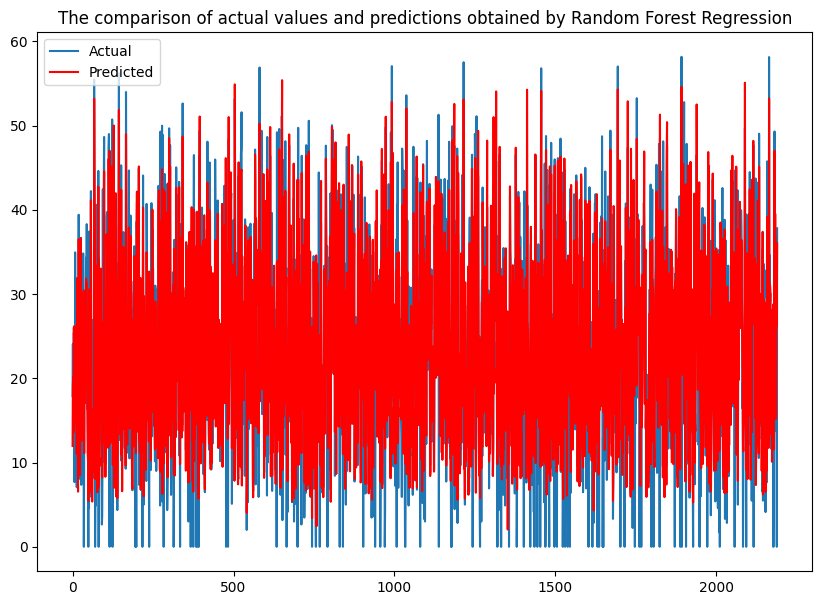

In [116]:
#Plotting the comparison between actual and predicted values obtained by Random Forest Regression
plot_comparison(Y_test_pred_rf,'Random Forest Regression')

In [117]:
#Calculating the evaluation metrics for Random Forest Regression
eval_metrics(Y_test_pred_rf,'Random Forest Regression')

The evaluation metrics for Random Forest Regression are given as:
MSE : 47.093967651661856
RMSE : 6.862504473707967
R2 : 0.7018735208600291
Adjusted R2 : 0.7003678315714434


**Note:** As we can see the quality of model prediction has drastically improved.

## <b>Model Explainability</b>


Model explainability refers to the concept of being able to understand the machine learning model. For example – If a healthcare model is predicting whether a patient is suffering from a particular disease or not. The medical practitioners need to know what parameters the model is taking into account or if the model contains any bias. So, it is necessary that once the model is deployed in the real world. Then, the model developers can explain the model.

Popular techniques for model explainability:
1. LIME
2. SHAP
3. ELI-5

In this project I'll be using SHAP for model explainability. Among the various methods in SHAP I'll be using the SHAP summary plot, which plots features/columns in order of their impact on the predictions and also plots the SHAP values.

In [118]:
#Installing the shap library
!pip install shap

In [119]:
#Initialising javascript for visualisation of SHAP
import shap

In [120]:
#Creating a function to plot the shap summary plot
def shap_summary(model):
   explainer_shap = shap.Explainer(model=model, masker=X_train)
   shap_values = explainer_shap.shap_values(X_train)
   shap.summary_plot(shap_values,X_train,feature_names=X.columns)

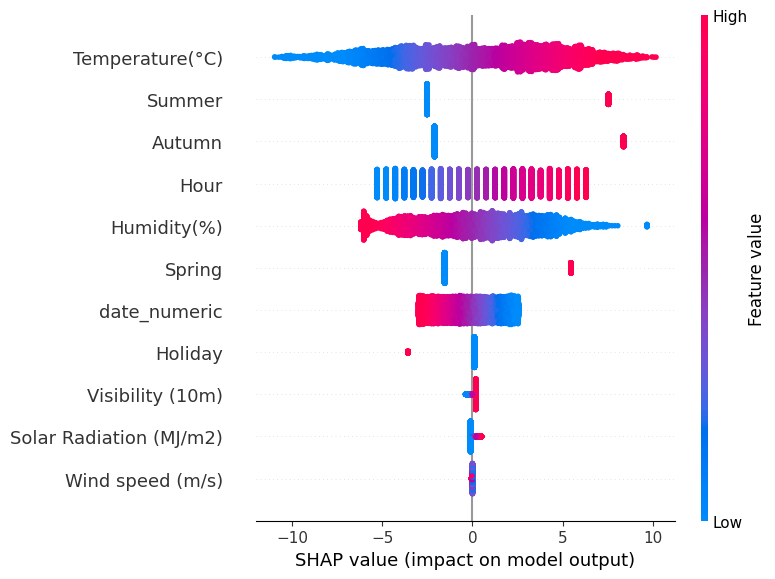

In [121]:
#Plotting shap summary plot for linear regression
shap_summary(lr_model)

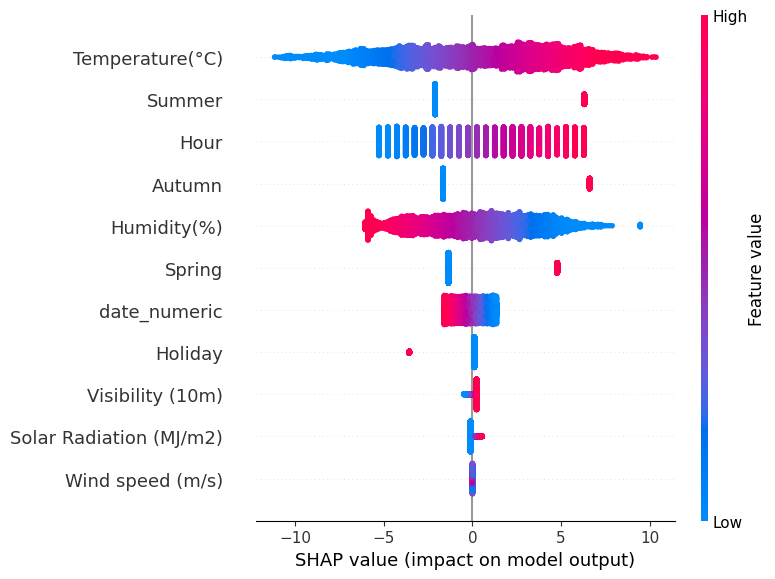

In [122]:
#Plotting shap summary plot for Ridge regression
shap_summary(ridge_model)

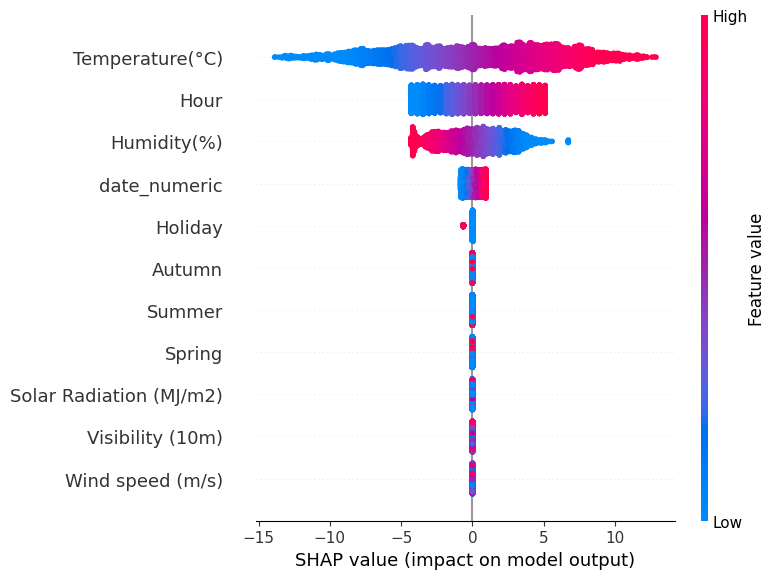

In [123]:
#Plotting shap summary plot for Lasso regression
shap_summary(lasso_model)

 97%|=================== | 6389/6570 [00:36<00:01]       

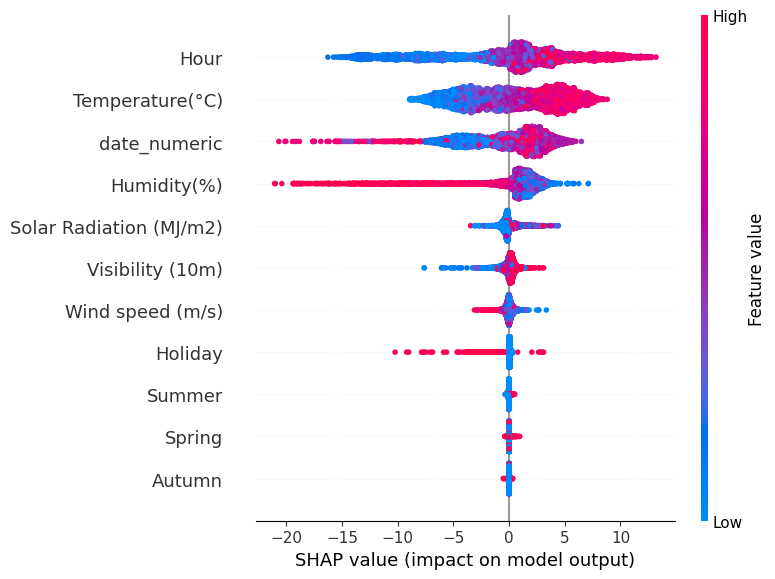

In [124]:
#Plotting shap summary plot for Random forest regression model
explainer_shap = shap.Explainer(model=rf_model, masker=X_train)
shap_values = explainer_shap.shap_values(X_train,check_additivity=False)
shap.summary_plot(shap_values,X_train,feature_names=X.columns)

We see that different importance or impact power is given to the features by each model and that defines how well the model performs on prediction. Random forest gives almost all the features a significant impact power and therefore it performs the best out of all the 4 models.

By looking at the SHAP summary plot for each model, we can figure out the feature importance and also its impact power by understanding the SHAP values.

## <b>Conclusion:</b>


1. EDA insights:
  * Most number of bikes are rented in the Summer season and the lowest in the winter season.
  * Over 96% of the bikes are rented on days that are considered as No Holiday.
  * Most number of bikes are rented in the temperature range of 15 degrees to 30 degrees.
  * Most number of bikes are rented when there is no snowfall or rainfall.
  * Majority of the bikes are rented for a humidity percentage range of 30 to 70.
  * The highest number of bike rentals have been done in the 18th hour, i.e 6pm, and lowest in the 4th hour, i.e 4am.
  * Most of the bike rentals have been made when there is high visibility.

2. Results from ML models:
  * Random Forest Regression is the best performing model with an r2 score of 0.6645.
  * Lasso Regression(L1 regularization) is the worst performing model with an r2 score of 0.4264.
  * Actual vs Prediction visualisation is done for all the 4 models.
  * All 4 models have been explained with the help of SHAP library.
  * Temperature and Hour are the two most important factors according to all the models.

3. Challenges faced:
  * Removing Outliers.
  * Encoding the categorical columns.
  * Removing Multicollinearity from the dataset.
  * Choosing Model explainability technique.